<h2>Data Preprocessing

In [ ]:
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
import os
from os import listdir
from os.path import isfile, join
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
def load_images_from_folder(folder):
    train_data=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        img=~img
        if img is not None:
            ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
            ret,ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
            cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
            w=int(28)
            h=int(28)
            maxi=0
            for c in cnt:
                x,y,w,h=cv2.boundingRect(c)
                maxi=max(w*h,maxi)
                if maxi==w*h:
                    x_max=x
                    y_max=y
                    w_max=w
                    h_max=h
            im_crop= thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
            im_resize = cv2.resize(im_crop,(28,28))
            im_resize=np.reshape(im_resize,(784,1))
            train_data.append(im_resize)
    return train_data

In [ ]:
data=[]

In [ ]:
#assign '-'=10
data=load_images_from_folder('/content/gdrive/MyDrive/train images/-')
len(data)
for i in range(0,len(data)):
    data[i]=np.append(data[i],['10'])
    
print(len(data))


4152


In [ ]:
#assign + = 11
data11=load_images_from_folder('/content/gdrive/MyDrive/train images/+')

for i in range(0,len(data11)):
    data11[i]=np.append(data11[i],['11'])
data=np.concatenate((data,data11))
print(len(data))


8184


In [ ]:
data0=load_images_from_folder('/content/gdrive/MyDrive/train images/0')
for i in range(0,len(data0)):
    data0[i]=np.append(data0[i],['0'])
data=np.concatenate((data,data0))
print(len(data))

In [ ]:
data1=load_images_from_folder('/content/gdrive/MyDrive/train images/1')

for i in range(0,len(data1)):
    data1[i]=np.append(data1[i],['1'])
data=np.concatenate((data,data1))
print(len(data))

In [ ]:
data2=load_images_from_folder('/content/gdrive/MyDrive/train images/2')

for i in range(0,len(data2)):
    data2[i]=np.append(data2[i],['2'])
data=np.concatenate((data,data2))
print(len(data))

In [ ]:
data3=load_images_from_folder('/content/gdrive/MyDrive/train images/3')

for i in range(0,len(data3)):
    data3[i]=np.append(data3[i],['3'])
data=np.concatenate((data,data3))
print(len(data))

In [ ]:
data4=load_images_from_folder('/content/gdrive/MyDrive/train images/4')

for i in range(0,len(data4)):
    data4[i]=np.append(data4[i],['4'])
data=np.concatenate((data,data4))
print(len(data))

In [ ]:
data5=load_images_from_folder('/content/gdrive/MyDrive/train images/5')

for i in range(0,len(data5)):
    data5[i]=np.append(data5[i],['5'])
data=np.concatenate((data,data5))
print(len(data))

In [ ]:
data6=load_images_from_folder('/content/gdrive/MyDrive/train images/6')

for i in range(0,len(data6)):
    data6[i]=np.append(data6[i],['6'])
data=np.concatenate((data,data6))
print(len(data))

In [ ]:
data7=load_images_from_folder('/content/gdrive/MyDrive/train images/7')

for i in range(0,len(data7)):
    data7[i]=np.append(data7[i],['7'])
data=np.concatenate((data,data7))
print(len(data))

In [ ]:
data8=load_images_from_folder('/content/gdrive/MyDrive/train images/8')

for i in range(0,len(data8)):
    data8[i]=np.append(data8[i],['8'])
data=np.concatenate((data,data8))
print(len(data))

In [ ]:
data9=load_images_from_folder('/content/gdrive/MyDrive/train images/9')

for i in range(0,len(data9)):
    data9[i]=np.append(data9[i],['9'])
data=np.concatenate((data,data9))
print(len(data))

In [ ]:
#assign * = 12
data12=load_images_from_folder('/content/gdrive/MyDrive/train images/times')

for i in range(0,len(data12)):
    data12[i]=np.append(data12[i],['12'])
data=np.concatenate((data,data12))
print(len(data))

In [ ]:
df=pd.DataFrame(data,index=None)
df.to_csv('train_final.csv',index=False)

<h2> Training the model

In [ ]:
import pandas as pd
import numpy as np
import pickle

In [ ]:
#Importing the csv file
df_train = pd.read_csv('/content/gdrive/MyDrive/train_final.csv',index_col=False)
labels=df_train[['784']] 

In [ ]:
#Droping the last column i.e. label
df_train.drop(df_train.columns[[784]],axis=1,inplace=True)
df_train.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,0,0,35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,244,219,219,219,219,219,219,219,219,219,219,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,177,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Importing the all the necessary libraries for cnn
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
keras.backend.image_data_format()
keras.backend.set_image_data_format('channels_first')
K.set_image_dim_ordering('th')


In [ ]:
labels=np.array(labels)

In [ ]:
#Converting label data into catergorical data
from keras.utils.np_utils import to_categorical
cat=to_categorical(labels,num_classes=13)

In [ ]:
print(cat[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
df_train.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,0,0,35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,244,219,219,219,219,219,219,219,219,219,219,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,177,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Reshaping the dataset
l=[]
for i in range(47504):
    l.append(np.array(df_train[i:i+1]).reshape(1,28,28))

In [ ]:
np.random.seed(7)

In [ ]:
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(1 , 28, 28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 24, 24)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 12, 12)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 10, 10)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 5, 5)          0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 5, 5)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               4

In [ ]:
from keras.models import model_from_json

In [ ]:
model.fit(np.array(l), cat, epochs=10, batch_size=200,shuffle=True,verbose=1) #Fitting the model to the dataset

Epoch 1/10
238/238 [==============================] - 34s 10ms/step - loss: 2.4464 - accuracy: 0.6222
Epoch 2/10
238/238 [==============================] - 2s 9ms/step - loss: 0.2787 - accuracy: 0.9133
Epoch 3/10
238/238 [==============================] - 2s 8ms/step - loss: 0.1600 - accuracy: 0.9488
Epoch 4/10
238/238 [==============================] - 2s 8ms/step - loss: 0.1114 - accuracy: 0.9656
Epoch 5/10
238/238 [==============================] - 2s 9ms/step - loss: 0.0873 - accuracy: 0.9728
Epoch 6/10
238/238 [==============================] - 2s 8ms/step - loss: 0.0750 - accuracy: 0.9764
Epoch 7/10
238/238 [==============================] - 2s 8ms/step - loss: 0.0608 - accuracy: 0.9815
Epoch 8/10
238/238 [==============================] - 2s 8ms/step - loss: 0.0553 - accuracy: 0.9827
Epoch 9/10
238/238 [==============================] - 2s 8ms/step - loss: 0.0467 - accuracy: 0.9861
Epoch 10/10
238/238 [==============================] - 2s 8ms/step - loss: 0.0455 - accuracy: 0.98

In [ ]:
# Saving the model
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")

In [ ]:
pip freeze

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argcomplete==1.12.3
argon2-cffi==21.1.0
arviz==0.11.4
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.2.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==4.1.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.10
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2021.10.8
cffi==1.15.0
cftime==1.5.1.1
chardet==3.0.4
charset-normalizer==2.0.7
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cupy-cuda111==9.4.0
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.11.0
cymem==2.0.6
Cython==0.29.24
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.4


<h2> Testing


In [ ]:
import cv2
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.models import model_from_json

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
json_file = open('/content/gdrive/MyDrive/model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/gdrive/MyDrive/model_final.h5")

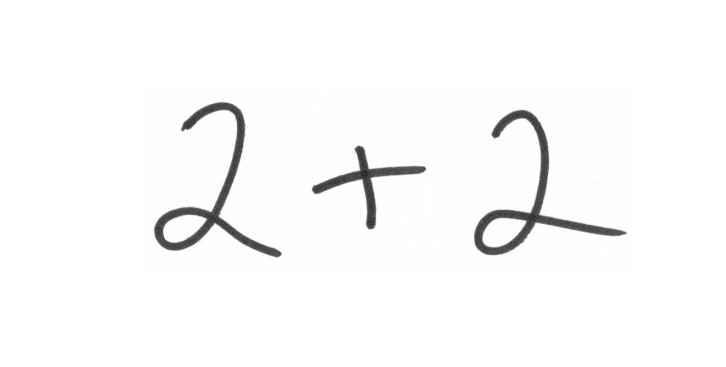

In [ ]:
import cv2
import numpy as np
#img = cv2.imread('/content/drive/MyDrive/test.jpeg',cv2.IMREAD_GRAYSCALE)
#img = cv2.imread('/content/drive/MyDrive/test2.jpg',cv2.IMREAD_GRAYSCALE)
img = cv2.imread('/content/drive/MyDrive/test3.jpg',cv2.IMREAD_GRAYSCALE)
#kernel = np.ones((3,3),np.uint8)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
#erosion = cv2.erode(img,kernel,iterations = 3)
#dilation = cv2.dilate(img,kernel,iterations = 1)
#img=dilation
if img is not None:
    #images.append(img)
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY) #Converting image into binary and inverting it
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) #Obtaining Contours from the image
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0]) #Obtaining bounding rectangle for each contour
    w=int(28)
    h=int(28)
    train_data=[]
    #print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    #print(rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    #print(bool_rect)

    #Discarding smaller bounding rectangle
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    #print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    #print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        

        im_resize = cv2.resize(im_crop,(28,28)) #Resizing the images
        cv2_imshow(im_resize)
        #cv2.imshow("work",im_resize)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        im_resize=np.reshape(im_resize,(1,28,28))
        train_data.append(im_resize)

In [ ]:
#Prediction
s=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,1,28,28)
    result=loaded_model.predict(train_data[i])
    
    
    if(np.argmax(result[0])==10):
        s=s+'-'
    if(np.argmax(result[0])==11):
        s=s+'+'
    if(np.argmax(result[0])==12):
        s=s+'*'
    if(np.argmax(result[0])==0):
        s=s+'0'
    if(np.argmax(result[0])==1):
        s=s+'1'
    if(np.argmax(result[0])==2):
        s=s+'2'
    if(np.argmax(result[0])==3):
        s=s+'3'
    if(np.argmax(result[0])==4):
        s=s+'4'
    if(np.argmax(result[0])==5):
        s=s+'5'
    if(np.argmax(result[0])==6):
        s=s+'6'
    if(np.argmax(result[0])==7):
        s=s+'7'
    if(np.argmax(result[0])==8):
        s=s+'8'
    if(np.argmax(result[0])==9):
        s=s+'9'

print(s)

2+2


In [ ]:
eval(s)

4